In [220]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [221]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [222]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

dataset = pd.read_csv('parkinsons.csv')
dataset

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.000070,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,Missing,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.4,148.65,113.819,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,Parkinson's,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.0827,0.01309,20.651,Parkinson's,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,None,137.871,111.366,0.00997,0.000090,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,Parkinson's,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.000110,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.1047,0.01767,19.649,Parkinson's,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,None,None,0.00968,0.000080,0.00463,0.0075,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,Parkinson's,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.82,0.00333,0.000030,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,Parkinson's,0.59604,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.84,104.315,0.00290,0.000030,0.00144,0.00182,None,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,Parkinson's,0.63742,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.73,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.0088,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.0107,21.812,Parkinson's,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.000060,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,Parkinson's,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [223]:
dataset.drop(['name'], inplace=True, axis = 1)
dataset


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.000070,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,Missing,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.4,148.65,113.819,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,Parkinson's,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.0827,0.01309,20.651,Parkinson's,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,None,137.871,111.366,0.00997,0.000090,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,Parkinson's,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.000110,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.1047,0.01767,19.649,Parkinson's,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,120.552,None,None,0.00968,0.000080,0.00463,0.0075,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,Parkinson's,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,120.267,137.244,114.82,0.00333,0.000030,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,Parkinson's,0.59604,0.764112,-5.634322,0.257682,1.854785,0.211756
7,107.332,113.84,104.315,0.00290,0.000030,0.00144,0.00182,None,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,Parkinson's,0.63742,0.763262,-6.167603,0.183721,2.064693,0.163755
8,95.73,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.0088,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.0107,21.812,Parkinson's,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,95.056,120.103,91.226,0.00532,0.000060,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,Parkinson's,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [224]:
df=pd.DataFrame(dataset)
col=df.pop('status')
df.insert(22,'status',col)
display(df)



,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.000070,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,Missing
1,122.4,148.65,113.819,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,Parkinson's
2,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.0827,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,Parkinson's
3,None,137.871,111.366,0.00997,0.000090,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,Parkinson's
4,116.014,141.781,110.655,0.01284,0.000110,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.1047,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,Parkinson's
5,120.552,None,None,0.00968,0.000080,0.00463,0.0075,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775,Parkinson's
6,120.267,137.244,114.82,0.00333,0.000030,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,0.59604,0.764112,-5.634322,0.257682,1.854785,0.211756,Parkinson's
7,107.332,113.84,104.315,0.00290,0.000030,0.00144,0.00182,None,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,0.63742,0.763262,-6.167603,0.183721,2.064693,0.163755,Parkinson's
8,95.73,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.0088,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.0107,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571,Parkinson's
9,95.056,120.103,91.226,0.00532,0.000060,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362,Parkinson's


In [225]:
arr= df.columns
df.replace('NA', np.nan, inplace = True)
df.replace('Missing', np.nan, inplace = True)
df.replace("None", np.nan, inplace = True)
df


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.000070,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,NaN
1,122.4,148.65,113.819,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,Parkinson's
2,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.0827,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,Parkinson's
3,NaN,137.871,111.366,0.00997,0.000090,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,Parkinson's
4,116.014,141.781,110.655,0.01284,0.000110,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.1047,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,Parkinson's
5,120.552,NaN,NaN,0.00968,0.000080,0.00463,0.0075,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775,Parkinson's
6,120.267,137.244,114.82,0.00333,0.000030,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,0.59604,0.764112,-5.634322,0.257682,1.854785,0.211756,Parkinson's
7,107.332,113.84,104.315,0.00290,0.000030,0.00144,0.00182,NaN,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,0.63742,0.763262,-6.167603,0.183721,2.064693,0.163755,Parkinson's
8,95.73,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.0088,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.0107,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571,Parkinson's
9,95.056,120.103,91.226,0.00532,0.000060,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362,Parkinson's


In [226]:
for i in range(22) :
  df[arr[i]] = df[arr[i]].fillna(0)
  df = df.astype({arr[i]: float})
  df.replace(0, df[arr[i]].mean(axis = 0), inplace = True)
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992000,157.302000,74.997000,0.00784,0.000070,0.003700,0.005540,0.011090,0.04374,0.426,0.02182,0.031300,0.02971,0.065450,0.022110,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,NaN
1,122.400000,148.650000,113.819000,0.00968,0.000080,0.004650,0.006960,0.013940,0.06134,0.626,0.03134,0.045180,0.04368,0.094030,0.019290,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,Parkinson's
2,116.682000,131.111000,111.555000,0.01050,0.000090,0.005440,0.007810,0.016330,0.05233,0.482,0.02757,0.038580,0.03590,0.082700,0.013090,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,Parkinson's
3,152.809427,137.871000,111.366000,0.00997,0.000090,0.005020,0.006980,0.015050,0.05492,0.517,0.02924,0.040050,0.03772,0.087710,0.013530,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,Parkinson's
4,116.014000,141.781000,110.655000,0.01284,0.000110,0.006550,0.009080,0.019660,0.06425,0.584,0.03490,0.048250,0.04465,0.104700,0.017670,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,Parkinson's
5,120.552000,196.104879,113.374739,0.00968,0.000080,0.004630,0.007500,0.013880,0.04701,0.456,0.02328,0.035260,0.03243,0.069850,0.012220,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775,Parkinson's
6,120.267000,137.244000,114.820000,0.00333,0.000030,0.001550,0.002020,0.004660,0.01608,0.140,0.00779,0.009370,0.01351,0.023370,0.006070,24.886,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756,Parkinson's
7,107.332000,113.840000,104.315000,0.00290,0.000030,0.001440,0.001820,0.009825,0.01567,0.134,0.00829,0.009460,0.01256,0.024870,0.003440,26.892,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755,Parkinson's
8,95.730000,132.068000,91.754000,0.00551,0.000060,0.002930,0.003320,0.008800,0.02093,0.191,0.01073,0.012770,0.01717,0.032180,0.010700,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571,Parkinson's
9,95.056000,120.103000,91.226000,0.00532,0.000060,0.002680,0.003320,0.008030,0.02838,0.255,0.01441,0.017250,0.02444,0.043240,0.010220,21.862,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362,Parkinson's


In [227]:
df.dropna(inplace=True)
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
1,122.400000,148.650000,113.819000,0.00968,0.000080,0.004650,0.006960,0.013940,0.06134,0.626,0.03134,0.045180,0.04368,0.094030,0.019290,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,Parkinson's
2,116.682000,131.111000,111.555000,0.01050,0.000090,0.005440,0.007810,0.016330,0.05233,0.482,0.02757,0.038580,0.03590,0.082700,0.013090,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,Parkinson's
3,152.809427,137.871000,111.366000,0.00997,0.000090,0.005020,0.006980,0.015050,0.05492,0.517,0.02924,0.040050,0.03772,0.087710,0.013530,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,Parkinson's
4,116.014000,141.781000,110.655000,0.01284,0.000110,0.006550,0.009080,0.019660,0.06425,0.584,0.03490,0.048250,0.04465,0.104700,0.017670,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,Parkinson's
5,120.552000,196.104879,113.374739,0.00968,0.000080,0.004630,0.007500,0.013880,0.04701,0.456,0.02328,0.035260,0.03243,0.069850,0.012220,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775,Parkinson's
6,120.267000,137.244000,114.820000,0.00333,0.000030,0.001550,0.002020,0.004660,0.01608,0.140,0.00779,0.009370,0.01351,0.023370,0.006070,24.886,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756,Parkinson's
7,107.332000,113.840000,104.315000,0.00290,0.000030,0.001440,0.001820,0.009825,0.01567,0.134,0.00829,0.009460,0.01256,0.024870,0.003440,26.892,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755,Parkinson's
8,95.730000,132.068000,91.754000,0.00551,0.000060,0.002930,0.003320,0.008800,0.02093,0.191,0.01073,0.012770,0.01717,0.032180,0.010700,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571,Parkinson's
9,95.056000,120.103000,91.226000,0.00532,0.000060,0.002680,0.003320,0.008030,0.02838,0.255,0.01441,0.017250,0.02444,0.043240,0.010220,21.862,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362,Parkinson's
10,88.333000,112.240000,84.072000,0.00505,0.000060,0.002540,0.003300,0.007630,0.02143,0.197,0.01079,0.013420,0.01892,0.032370,0.011660,21.118,0.611137,0.776156,-5.249770,0.391002,2.407313,0.249740,Parkinson's


In [228]:
df.replace("Parkinson's", '1', inplace = True)
df.replace('Healthy', '0', inplace = True)
df = df.astype({'status' : int})
df


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
1,122.400000,148.650000,113.819000,0.00968,0.000080,0.004650,0.006960,0.013940,0.06134,0.626,0.03134,0.045180,0.04368,0.094030,0.019290,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682000,131.111000,111.555000,0.01050,0.000090,0.005440,0.007810,0.016330,0.05233,0.482,0.02757,0.038580,0.03590,0.082700,0.013090,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,152.809427,137.871000,111.366000,0.00997,0.000090,0.005020,0.006980,0.015050,0.05492,0.517,0.02924,0.040050,0.03772,0.087710,0.013530,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014000,141.781000,110.655000,0.01284,0.000110,0.006550,0.009080,0.019660,0.06425,0.584,0.03490,0.048250,0.04465,0.104700,0.017670,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
5,120.552000,196.104879,113.374739,0.00968,0.000080,0.004630,0.007500,0.013880,0.04701,0.456,0.02328,0.035260,0.03243,0.069850,0.012220,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775,1
6,120.267000,137.244000,114.820000,0.00333,0.000030,0.001550,0.002020,0.004660,0.01608,0.140,0.00779,0.009370,0.01351,0.023370,0.006070,24.886,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756,1
7,107.332000,113.840000,104.315000,0.00290,0.000030,0.001440,0.001820,0.009825,0.01567,0.134,0.00829,0.009460,0.01256,0.024870,0.003440,26.892,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755,1
8,95.730000,132.068000,91.754000,0.00551,0.000060,0.002930,0.003320,0.008800,0.02093,0.191,0.01073,0.012770,0.01717,0.032180,0.010700,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571,1
9,95.056000,120.103000,91.226000,0.00532,0.000060,0.002680,0.003320,0.008030,0.02838,0.255,0.01441,0.017250,0.02444,0.043240,0.010220,21.862,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362,1
10,88.333000,112.240000,84.072000,0.00505,0.000060,0.002540,0.003300,0.007630,0.02143,0.197,0.01079,0.013420,0.01892,0.032370,0.011660,21.118,0.611137,0.776156,-5.249770,0.391002,2.407313,0.249740,1


In [229]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [230]:
sc = StandardScaler()
X_test = sc.fit_transform(X_test)
X_train = sc.fit_transform(X_train)

In [231]:
classifierLogistic = LogisticRegression()
classifierLogistic.fit(X_train,Y_train)

LogisticRegression()

[[ 6  4]
 [ 1 28]]
0.8717948717948718


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


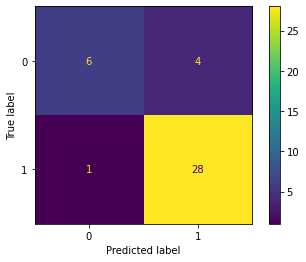

In [232]:
Y_pred = classifierLogistic.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print(accuracy_score(Y_test, Y_pred))
plot_confusion_matrix(classifierLogistic, X_test, Y_test)  

In [233]:
pip install gradio

In [234]:
import gradio as gr


def greet(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22):
    pre=[[x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22]]
    predf=pd.DataFrame(pre)
    pretra = sc.transform(predf)
    prediction = classifierLogistic.predict(pretra)
    ret=prediction[0].item()
    if ret==0 :  
      return "Healthy"
    return "Parkinson's"

iface = gr.Interface(fn=greet, inputs=["number","number","number","number","number","number","number","number","number","number","number","number","number","number","number","number","number","number","number","number","number","number"], outputs="text",allow_flagging="never")
iface.launch()


We want to invite you to become a beta user.
You'll get early access to new and premium features (persistent links, hosting, and more).
If you're interested please email: beta@gradio.app

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://19321.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7fe941611dd0>,
 'http://127.0.0.1:7884/',
 'https://19321.gradio.app')